# Compare prediction performance across outcome type

In [1]:
import polars as pl
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import MultiComparison

In [30]:
seal_preds = pl.read_parquet("./compiled_results/compiled_seal_metrics.parquet")

In [47]:
def get_prefix(label: str):
    return label.split("_")[0]

seal_preds = seal_preds.with_columns(
    pl.col("Metadata_Label").map_elements(lambda x: get_prefix(x), return_dtype=pl.String).alias("Metadata_Category"),
    (pl.col("Metadata_Count_0") + pl.col("Metadata_Count_1")).alias("Total_count"),
    (pl.col("Metadata_Count_1")/(pl.col("Metadata_Count_0") + pl.col("Metadata_Count_1"))).alias("Percent_positive"),
)

# Since we evaluate many iterations, filter such that each label is represented only once
unique_assays = seal_preds.filter(
    (pl.col("Metadata_AggType") == "all") 
    & (pl.col("Feat_type") == "dino")
)

## Compare annotation characteristics

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 14'. Pick better value with 'binwidth'.


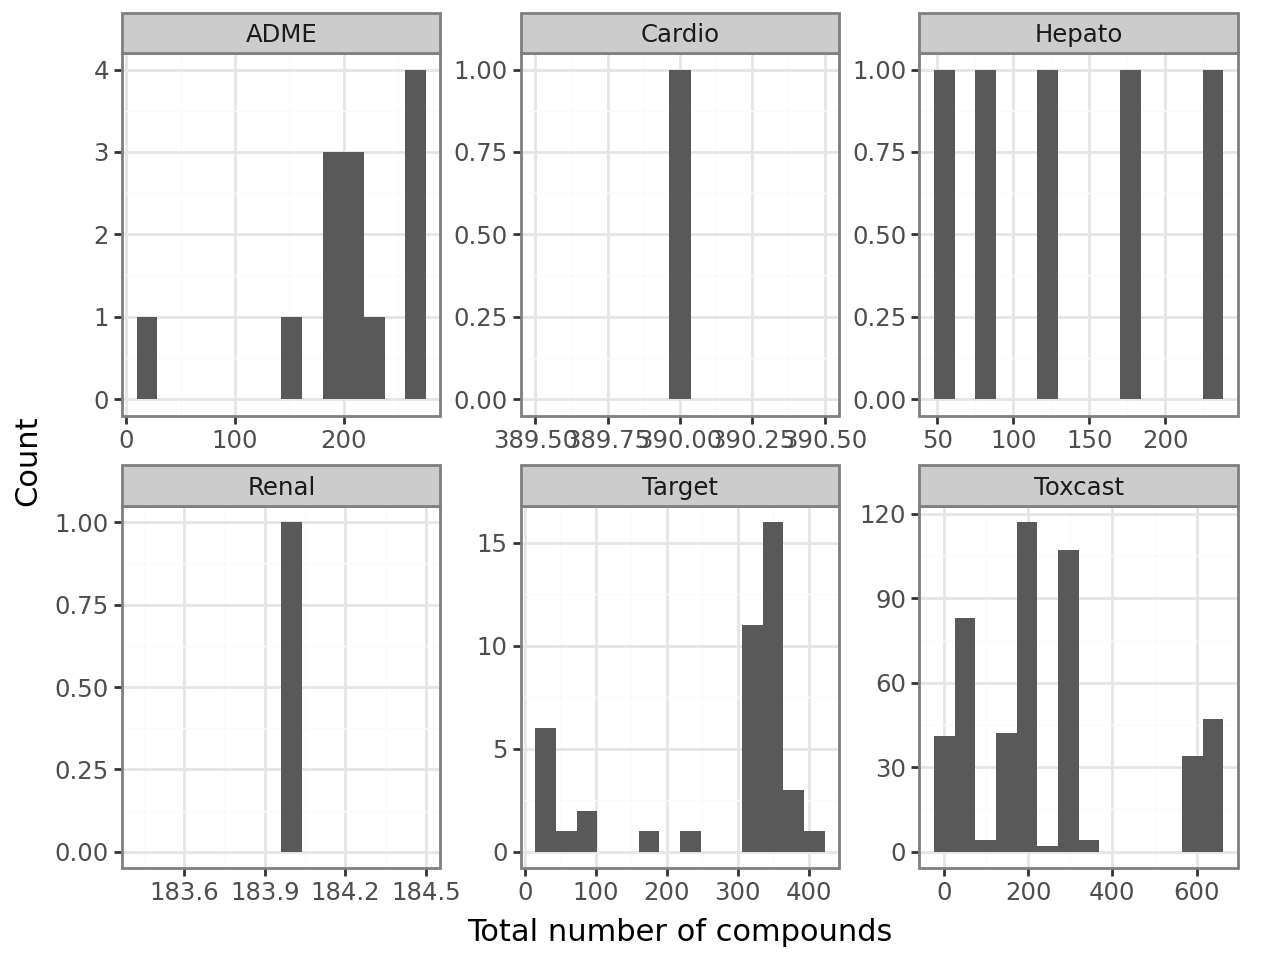

/dgx1nas1/storage/data/jess/miniforge3/envs/axiom/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 17'. Pick better value with 'binwidth'.


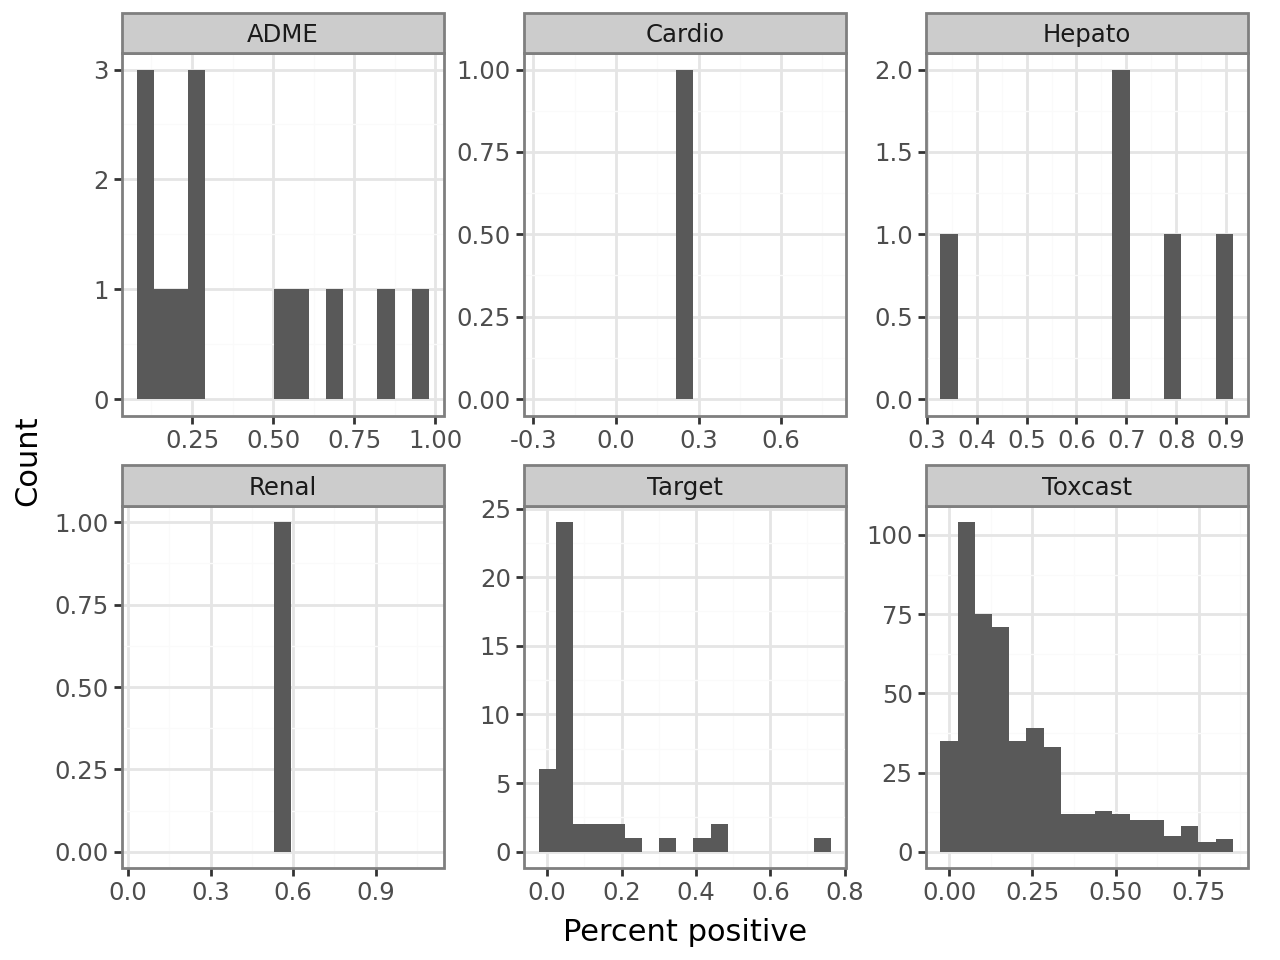

In [48]:
from plotnine import ggplot, aes, labs, theme_bw, facet_wrap, geom_histogram

plot = (
    ggplot(unique_assays, aes(x='Total_count')) +
    geom_histogram() +
    facet_wrap("Metadata_Category", scales="free") +
    labs(
        x='Total number of compounds',
        y='Count'
    ) +
    theme_bw()
)
plot.show()

plot = (
    ggplot(unique_assays, aes(x='Percent_positive')) +
    geom_histogram() +
    facet_wrap("Metadata_Category", scales="free") +
    labs(
        x='Percent positive',
        y='Count'
    ) +
    theme_bw()
)
plot.show()

## Compare performance

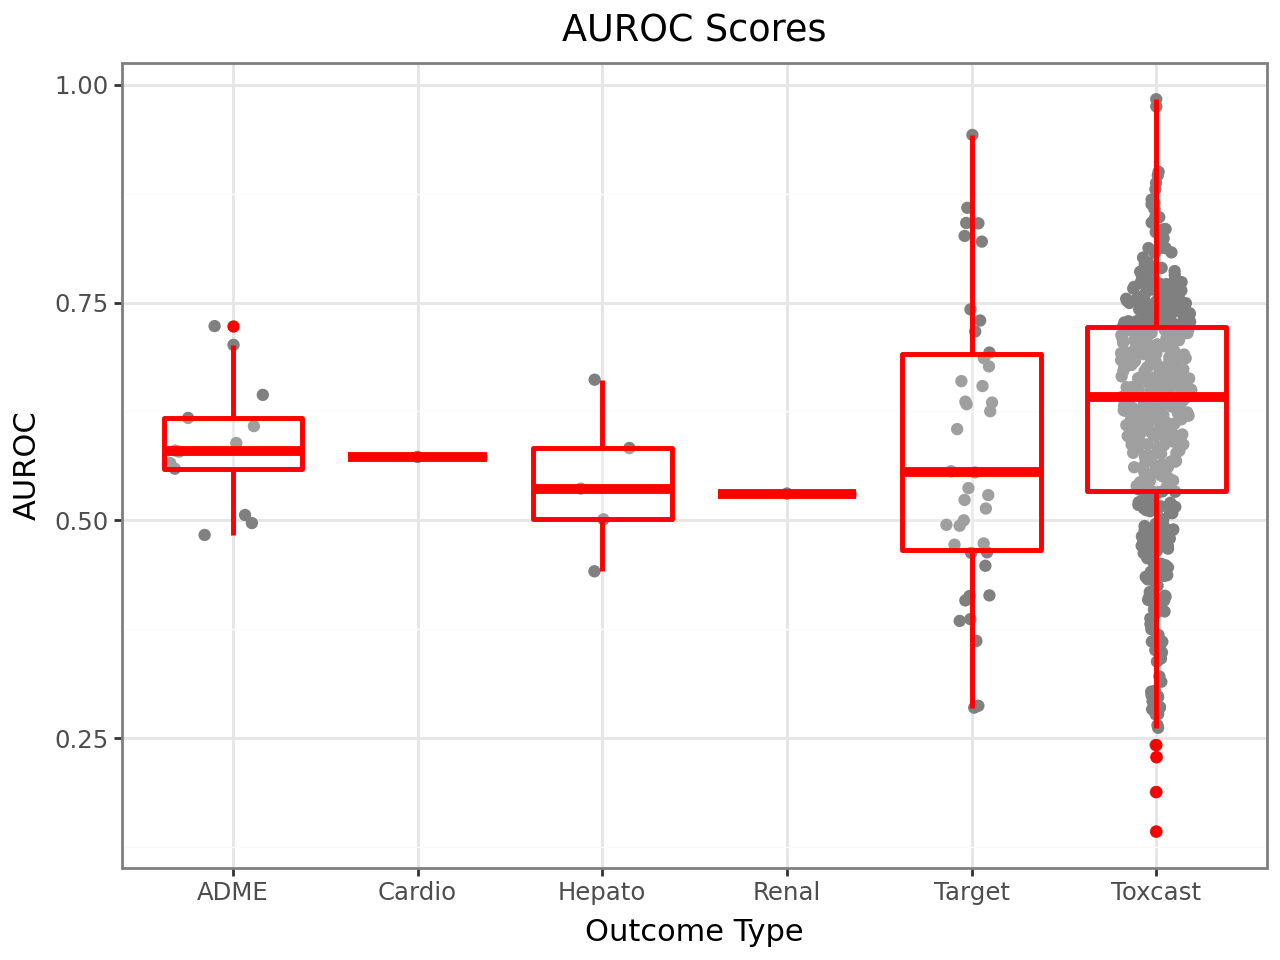

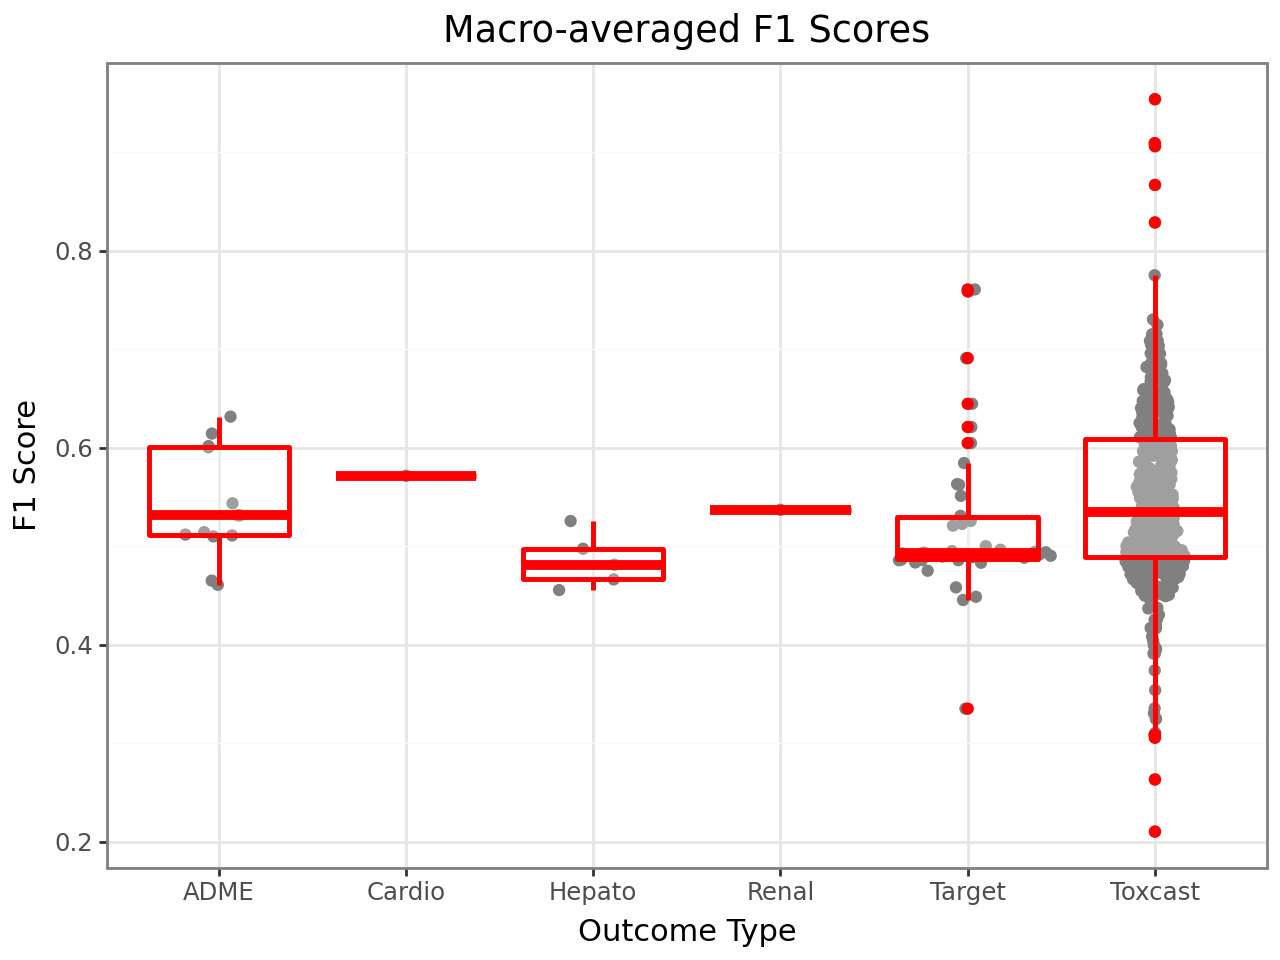

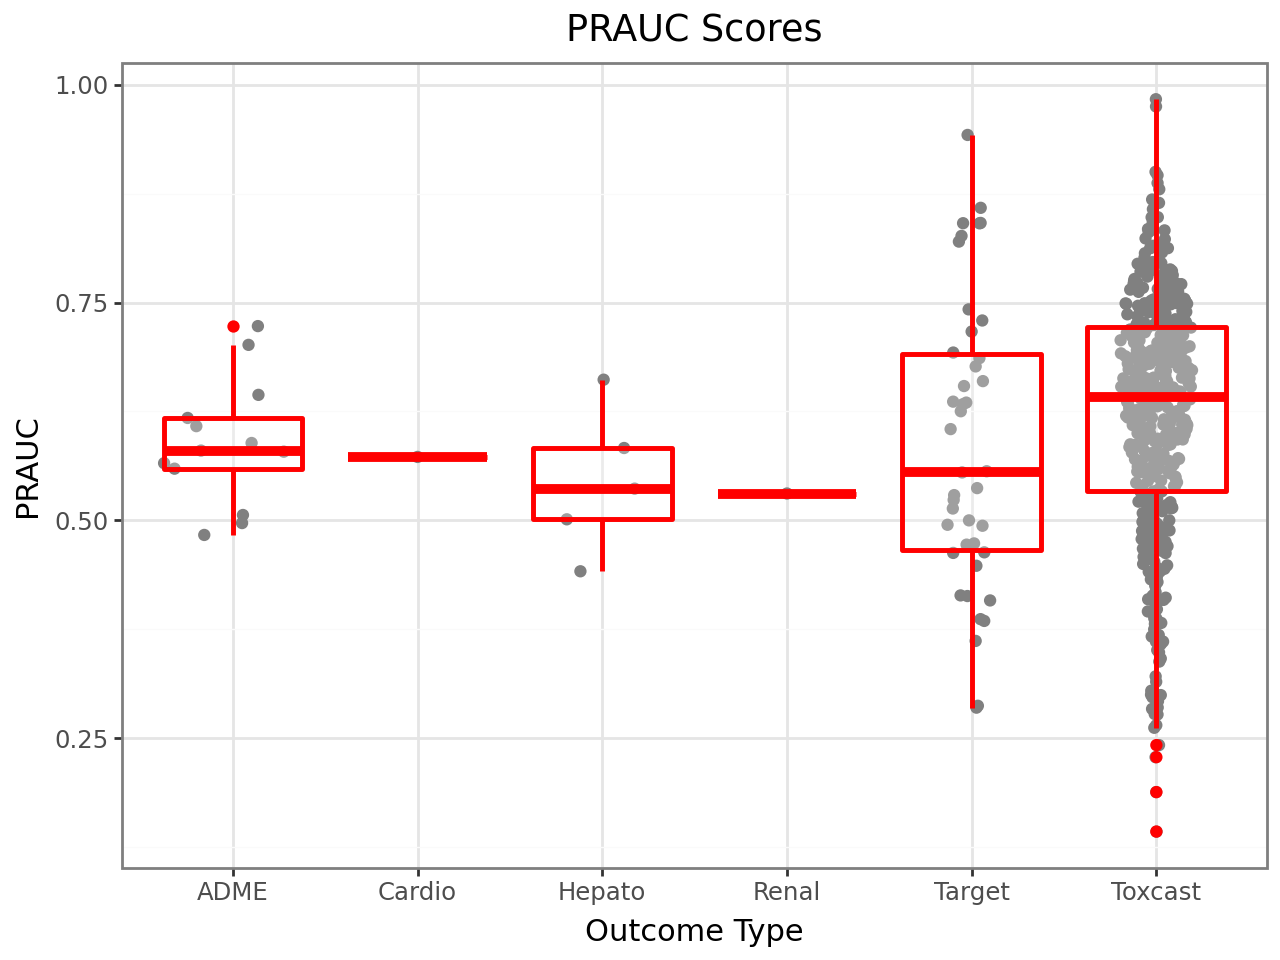

In [49]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(unique_assays, aes(x='Metadata_Category', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores', x='Outcome Type', y='AUROC') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(unique_assays, aes(x='Metadata_Category', y='F1_Score')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='Macro-averaged F1 Scores', x='Outcome Type', y='F1 Score') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(unique_assays, aes(x='Metadata_Category', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC Scores', x='Outcome Type', y='PRAUC') 
    + theme_bw()
)
plot.show()

## Compare across concentration for just Target and ToxCast

In [50]:
target = seal_preds.filter(
    (pl.col("Feat_type") == "dino")
    & (pl.col("Metadata_Category") == "Target")
)

toxcast = seal_preds.filter(
    (pl.col("Feat_type") == "dino")
    & (pl.col("Metadata_Category") == "Toxcast")
)


### Target

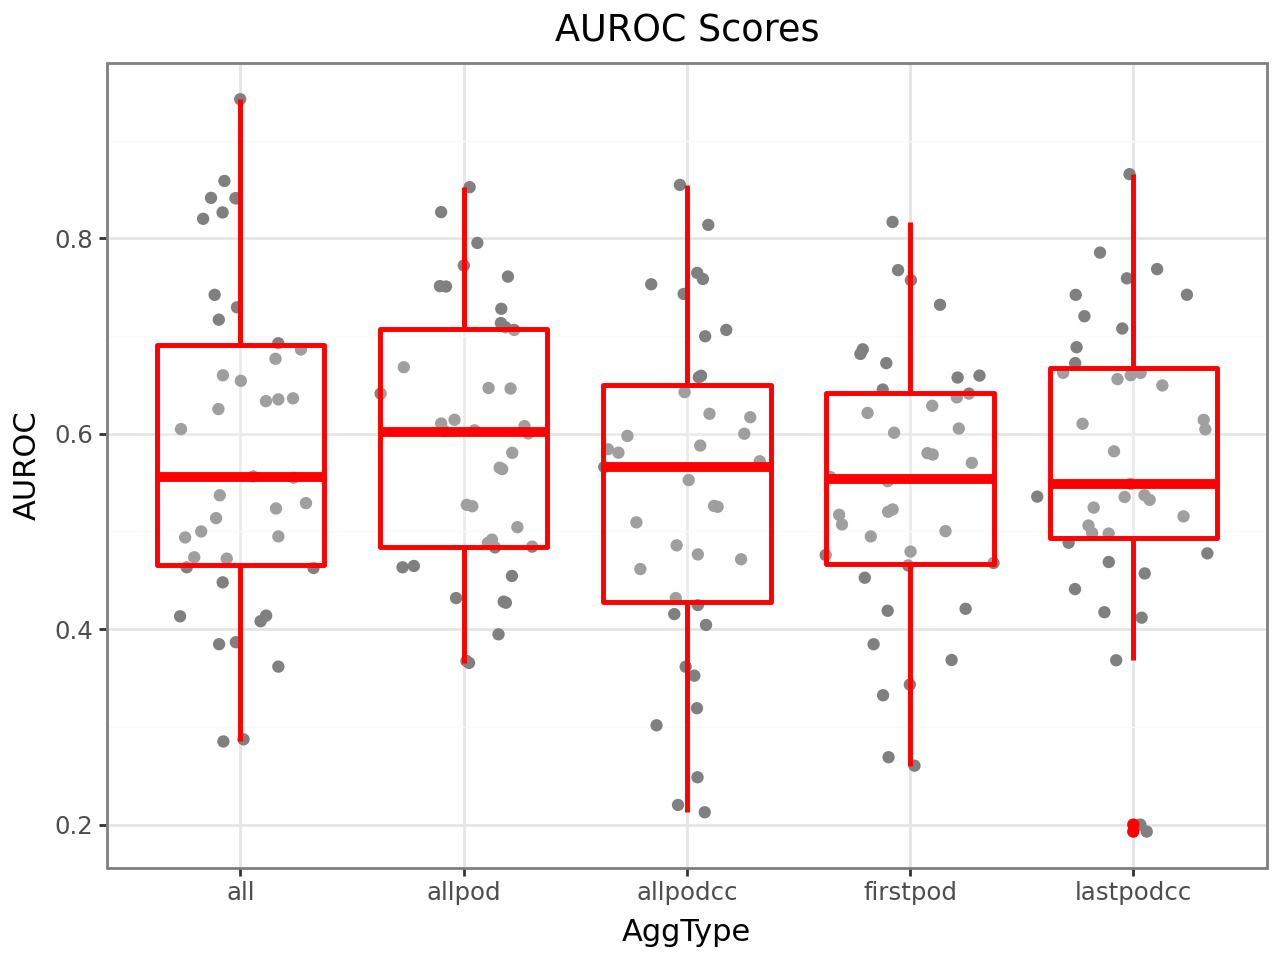

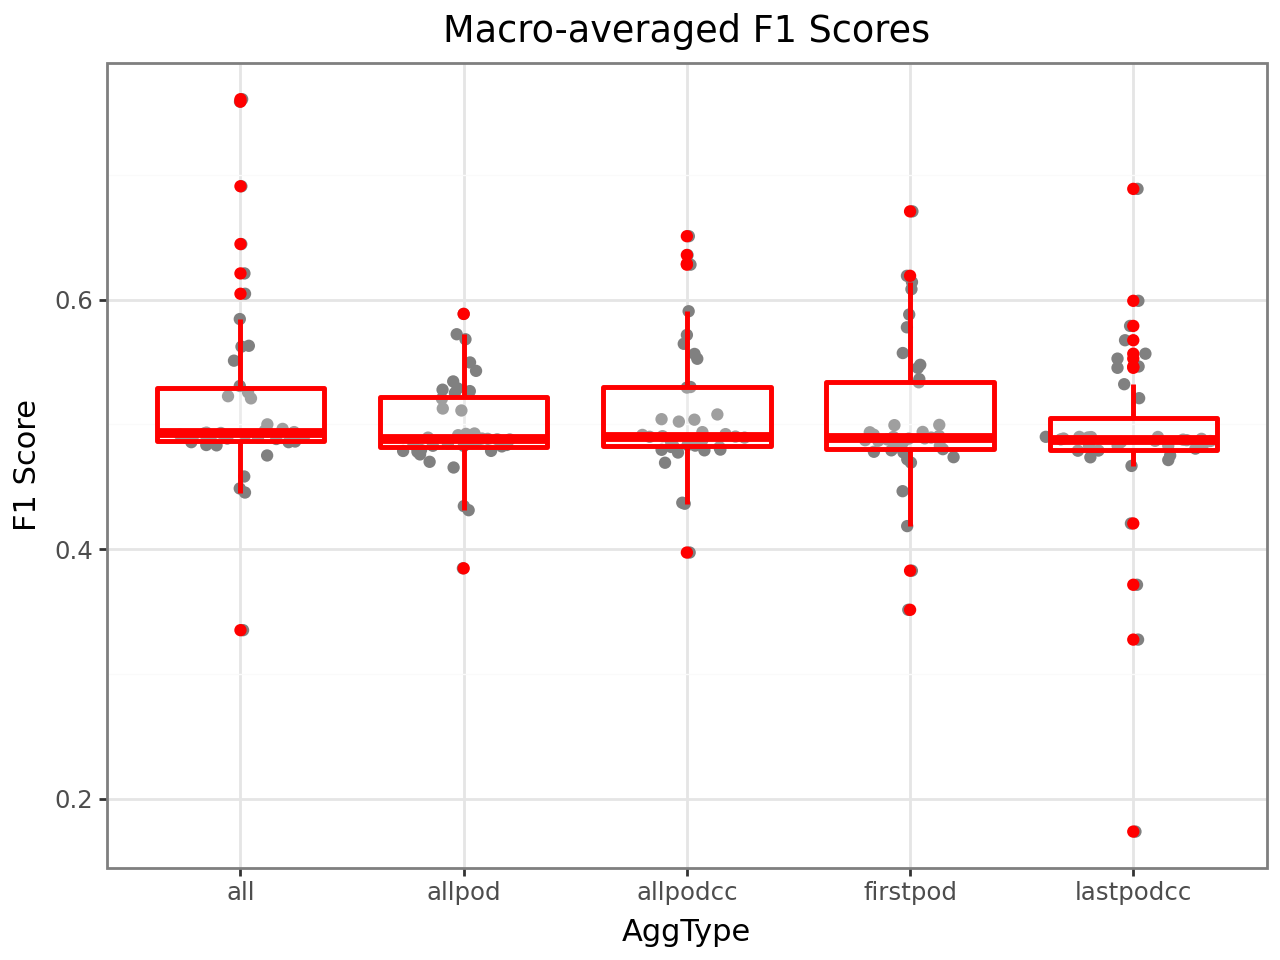

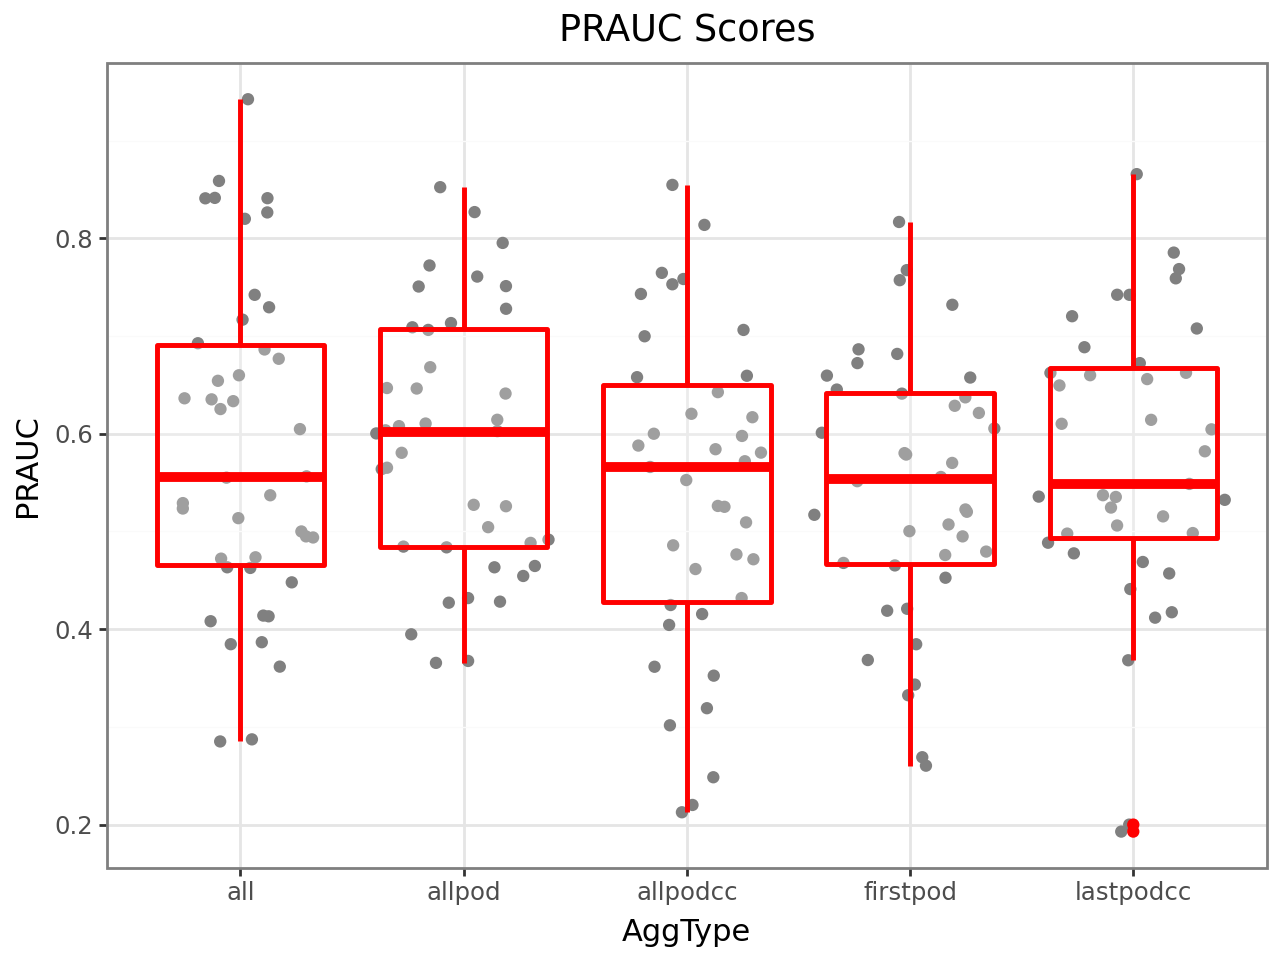

In [51]:

from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(target, aes(x='Metadata_AggType', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores', x='AggType', y='AUROC') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(target, aes(x='Metadata_AggType', y='F1_Score')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='Macro-averaged F1 Scores', x='AggType', y='F1 Score') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(target, aes(x='Metadata_AggType', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC Scores', x='AggType', y='PRAUC') 
    + theme_bw()
)
plot.show()

### Toxcast

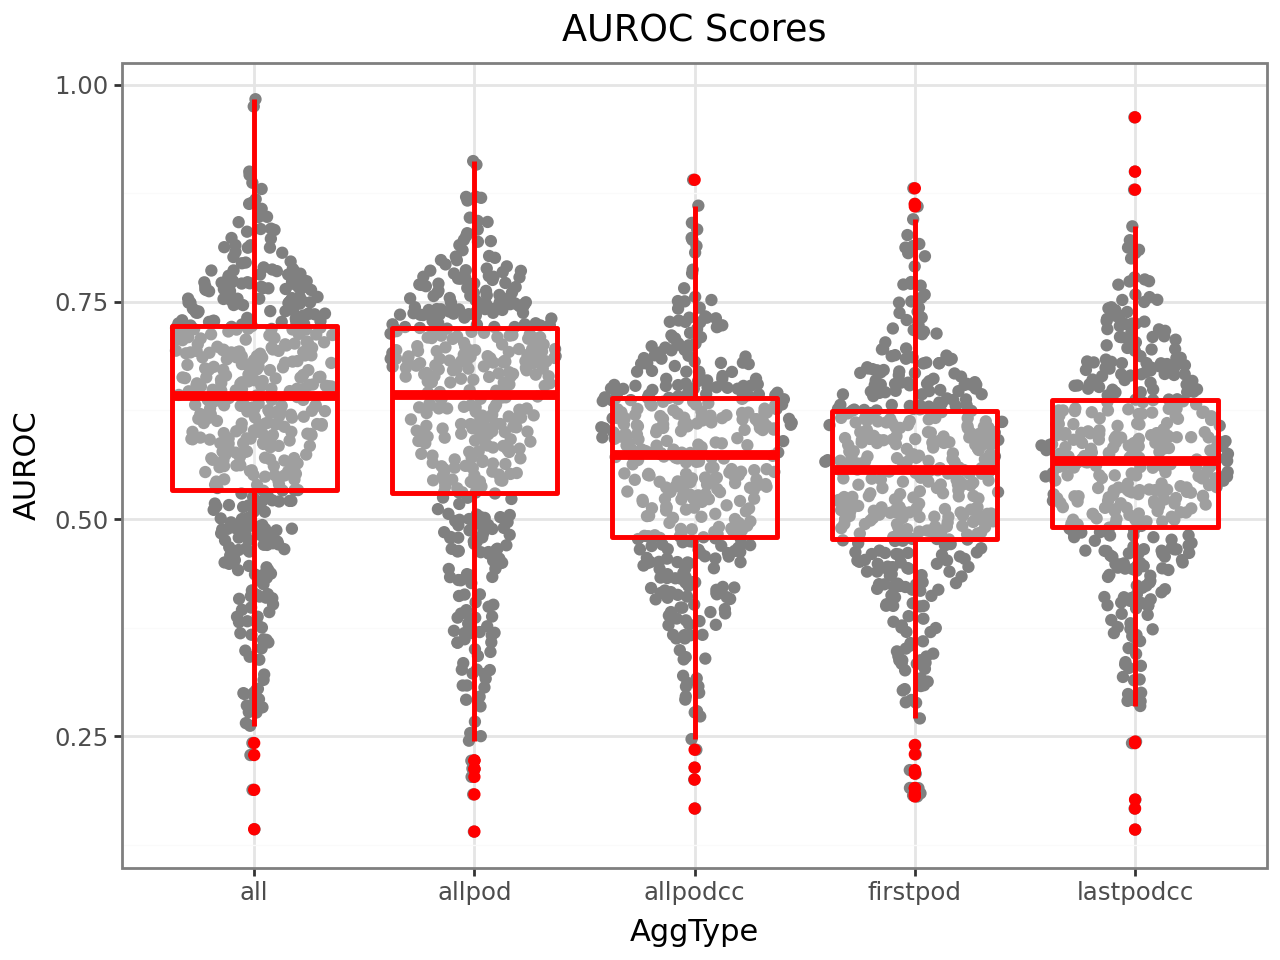

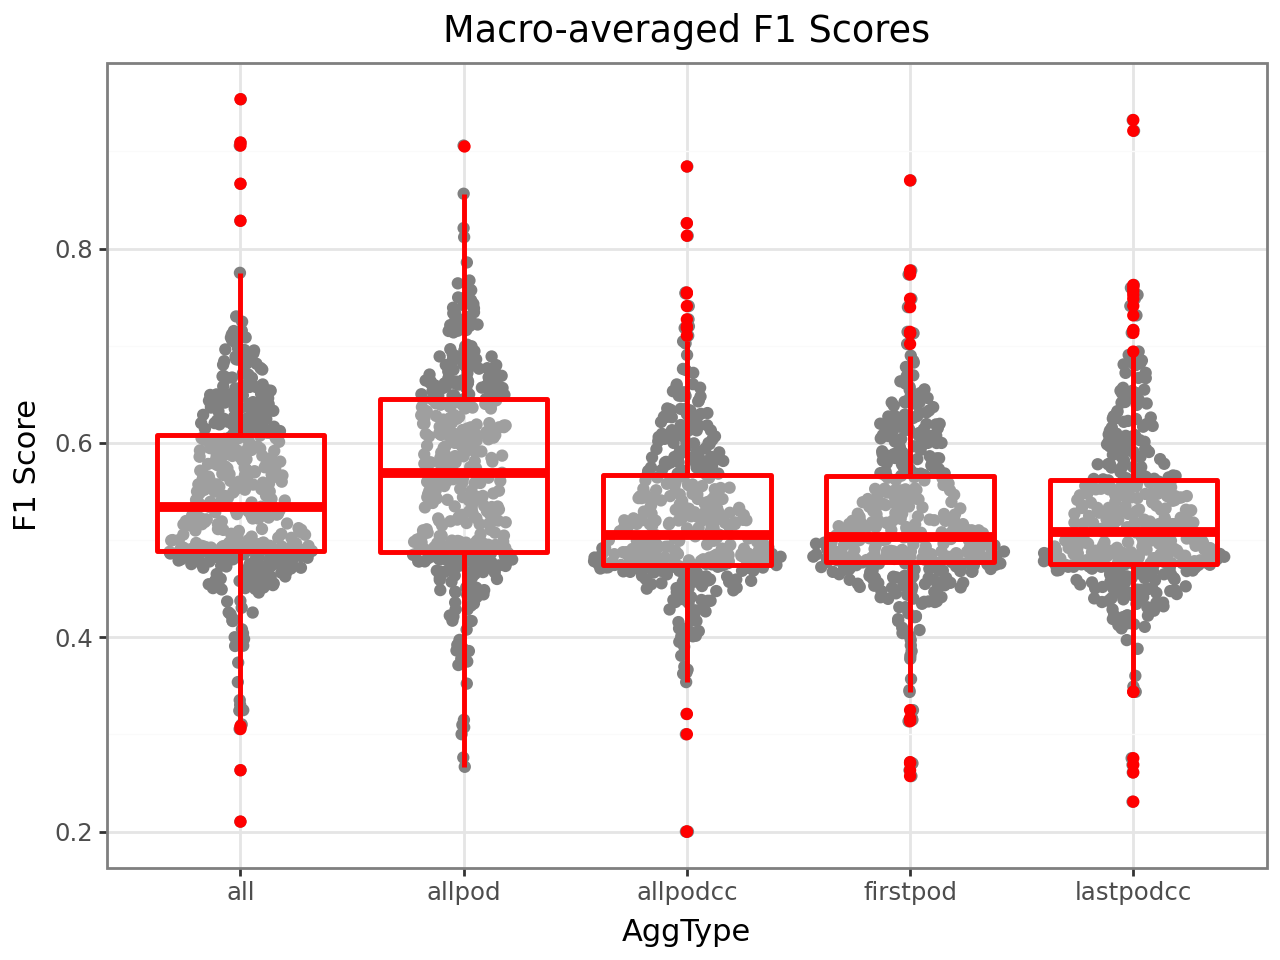

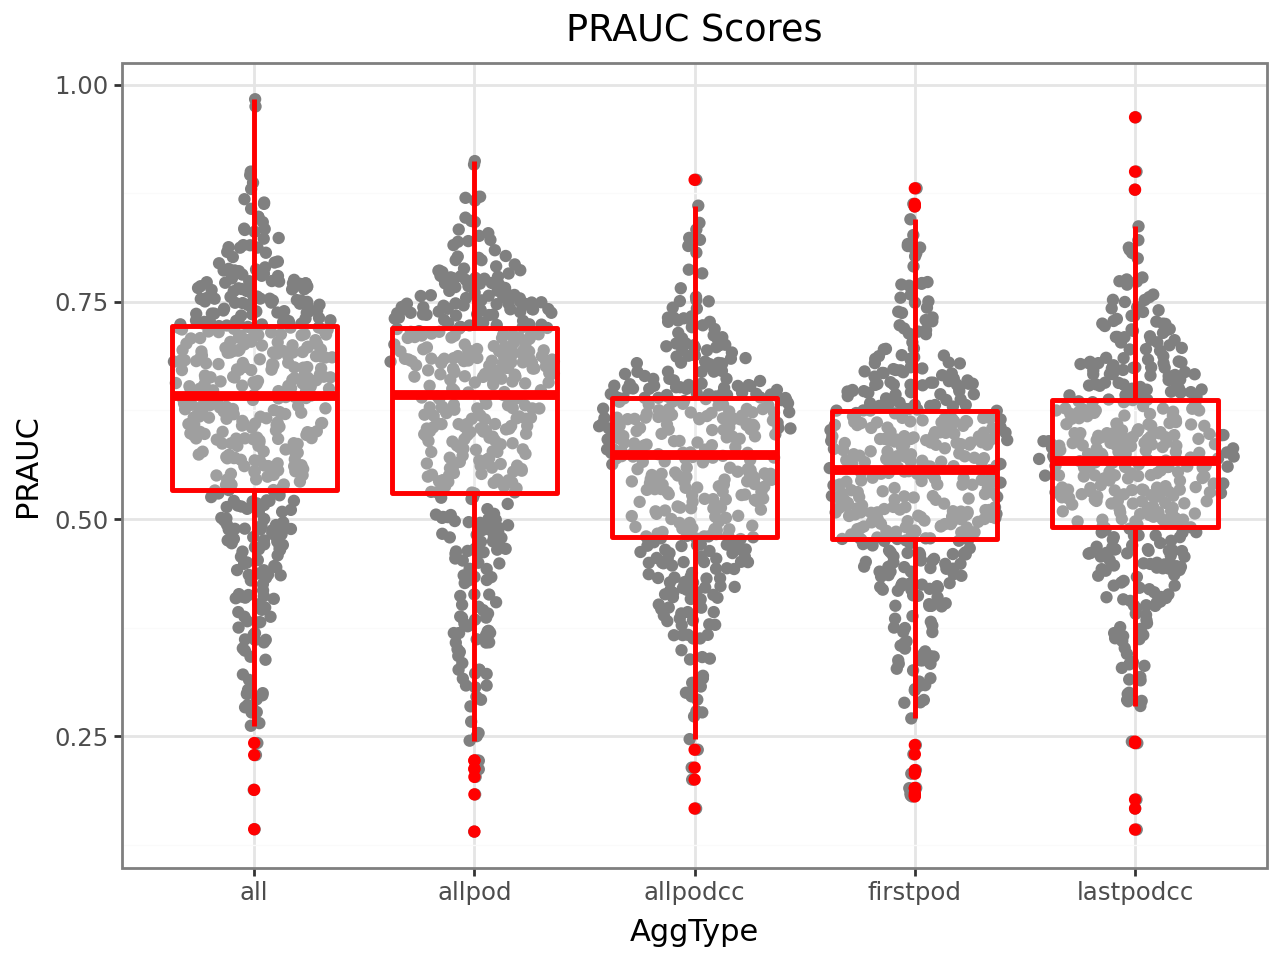

In [52]:
from plotnine import ggplot, aes, geom_sina, geom_boxplot, labs, theme_bw

plot = (
    ggplot(toxcast, aes(x='Metadata_AggType', y='AUROC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='AUROC Scores', x='AggType', y='AUROC') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(toxcast, aes(x='Metadata_AggType', y='F1_Score')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='Macro-averaged F1 Scores', x='AggType', y='F1 Score') 
    + theme_bw()
)
plot.show()

plot = (
    ggplot(toxcast, aes(x='Metadata_AggType', y='PRAUC')) 
    + geom_sina(color="grey") 
    + geom_boxplot(color="red", alpha=0.25, size=1)
    + labs(title='PRAUC Scores', x='AggType', y='PRAUC') 
    + theme_bw()
)
plot.show()